# Moments

In mathematics, the **moments** of a function are quantitative measures related to the shape of the function's graph. 

If the function represents **mass density**, then the **zeroth moment** is the **total mass**, **the first moment** (normalized by total mass) is the **centre of mass**, and the **second moment** is the **moment of inertia**. 

If the function is a **probability distribution**, then the **first moment** is **the expected value**, the **second central moment** is the **variance**, the **third standardized moment** is the **skewness**, and the **fourth standardized moment** is the **kurtosis**. 

The mathematical concept is closely related to the concept of moment in physics.


In [9]:
print(x_b_m1)
print(np.var(x_b))

0.5
0.5


In [6]:
from scipy.stats import moment

x_a_m1 = moment(x_a,moment=1) # 1st moment of x_a, equal to mean of x_a
x_b_m1 = moment(x_b,moment=2) # 1st moment of x_a, equal to mean of x_a


In [1]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Set the parameters
rate = 20480
duration = 1.0
# Calculate the signal
dt = 1/rate
t = np.arange(0, duration, dt)

x_a = np.ones(len(t))
x_b = 1* np.sin(2*np.pi * 30 * t)
x_c = 10* np.sin(2*np.pi * 30 * t)
x_d = 1* np.sin(2*np.pi * 15 * t)
x_e = np.concatenate((np.zeros(shape=int(len(t)/2)),np.ones(shape=int(len(t)/2))))
f1 = np.zeros(len(t)) 
f1[int(len(t)/2)]=1
x_f = f1
x_g = np.random.randn(len(t))
x_h = np.exp(-5.0 * t) * x_b
x_i = np.exp(-5.0 * t) * x_g
x_j = x_b + x_h
x_k = x_g + x_h
x_l = x_b + x_i

In [25]:
import scipy
s = x_b
print('mean')
print(np.mean(s))
print(moment(s,1))

print('var')
print(np.var(s))
print(moment(s,2))

print('skew')
print(scipy.stats.skew(s))
print(moment(s,3))

print('kurt')
print(scipy.stats.kurtosis(s))
print(moment(s,4))

mean
4.163336342344337e-18
0.0
var
0.5
0.5
skew
-7.850462293418875e-18
-2.7755575615628915e-18
kurt
-1.5
0.375


In [10]:
def hjorts_m(x): #no good
    m0 = moment(x,moment=0)
    m2 = moment(x,moment=2)
    m4 = moment(x,moment=4)

    act = m0
    mob = np.sqrt(m2/m0)
    com = np.sqrt((m4/m2)-(m2/m0))
    return act, mob, com


/var/folders/4r/993zkn5x3wl_sz7vk6j1zvj0l154gy/T/ipykernel_74922/1329540850.py:8: RuntimeWarning: invalid value encountered in double_scalars
  com = np.sqrt((m4/m2)-(m2/m0))


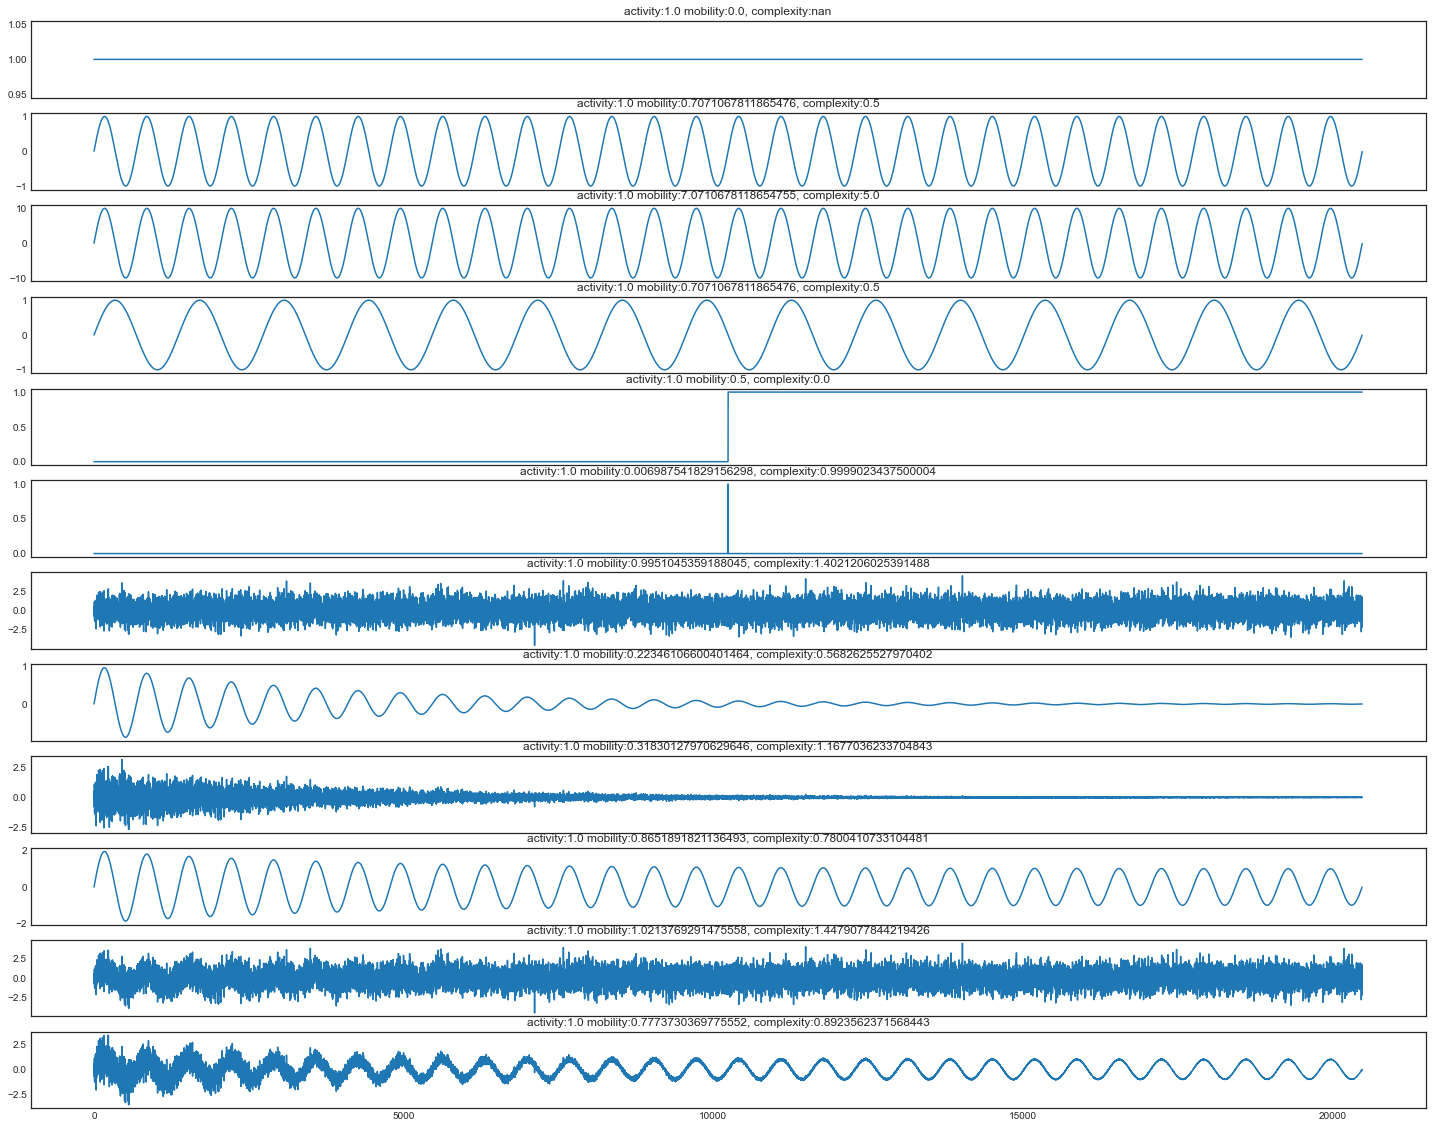

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

signals = [x_a,x_b,x_c,x_d,x_e,x_f,x_g,x_h,x_i,x_j,x_k,x_l]
len(signals)

feat = []
fig, ax = plt.subplots(12, 1, sharex='col', sharey='row',figsize=(25,20))
for j in range(len(signals)):
        ax[j].plot(signals[j])
        activity, mobility, complexity = hjorts_m(signals[j])
        ax[j].set_title(f'activity:{activity} mobility:{mobility}, complexity:{complexity}')
        feat.append([activity, mobility, complexity])
        